In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import absolute, mean, std
from sklearn import linear_model
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.metrics import roc_curve, auc, confusion_matrix, r2_score, mean_squared_error

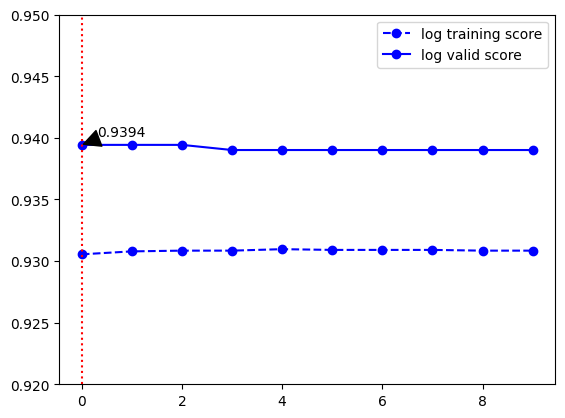

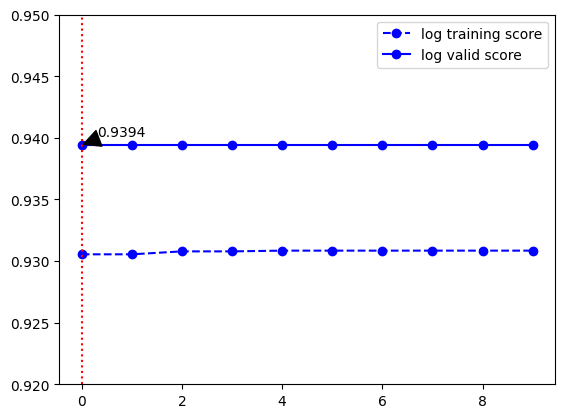

************************************************************
There are 6 set of X
X_train_selected_t1, X_train_selected_t2, X_valid_selected_t1,X_valid_selected_t2,X_test_selected_t1,X_test_selected_t2
------------------------------------------------------------
Normalized version
X_train_selected_t1_norm, X_train_selected_t2_norm, X_valid_selected_t1_norm,X_valid_selected_t2_norm,X_test_selected_t1_norm,X_test_selected_t2_norm
------------------------------------------------------------
There are 4 set of Y
y_train_t1, y_train_t2, y_valid_t1, y_valid_t2
when training, please use: 'y_train_t1_value,y_train_t2_value,y_valid_t1_value,y_valid_t2_value'
************************************************************


In [2]:
%run Data_preprocessing_realmean跑这个.ipynb

## Task 1


In [3]:
# Find most suitable index that can make the model perform best
l1_ratio_list=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
c_list=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10, 20, 50]


auc of  0.05  :  0.8234923001079862
auc of  0.1  :  0.8266761350298136
auc of  0.2  :  0.8279526034086107
auc of  0.3  :  0.8282372411850323
auc of  0.4  :  0.8284250434292689
auc of  0.5  :  0.8284367810695337
auc of  0.6  :  0.8284367810695338
auc of  0.7  :  0.8284661251701957
auc of  0.8  :  0.8285365510117846
auc of  0.9  :  0.8285453542419832
auc of  1.0  :  0.8285746983426452
auc of  10  :  0.8286920747452933
auc of  20  :  0.828689140335227
auc of  50  :  0.8286979435654256


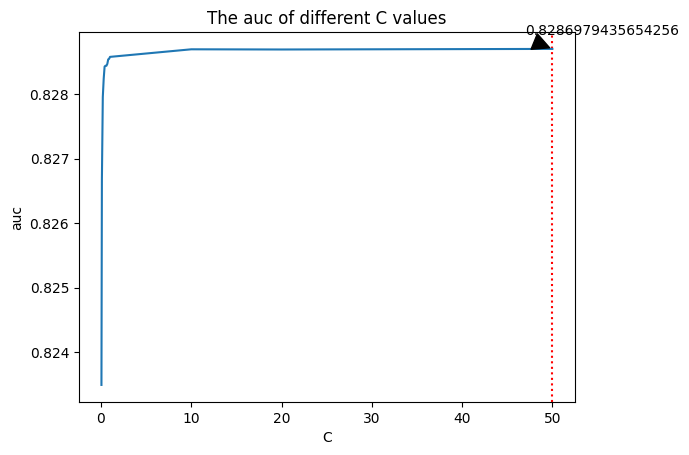

In [4]:
# train the logistic model with different c
import matplotlib.pyplot as plt

auc_list=[]
for c in c_list:
    clf = LogisticRegression(C= c, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=0.7).fit(X_train_selected_t1, y_train_t1_value)
    y_valid_score=clf.decision_function(X_valid_selected_t1)
    # compute ROC curve and AUC for each learning rate
    fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_score)
    roc_auc = auc(fpr, tpr)
    auc_list.append(roc_auc)
    print("auc of ", c ," : ", roc_auc)

max_auc=max(auc_list)
index= auc_list.index(max_auc)
loc=c_list[index]
plt.title("The auc of different C values")
plt.xlabel("C")
plt.ylabel("auc")
plt.axvline(x=loc, linestyle="dotted", color='r')
plt.annotate(max_auc, (loc, max_auc), xycoords="data", xytext=(50, 25), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10, horizontalalignment="center", verticalalignment="top")
plt.plot(c_list, auc_list)
#find best C: 50

auc of  0.1  :  0.8287126156157566
auc of  0.2  :  0.8287126156157566
auc of  0.3  :  0.8287126156157566
auc of  0.4  :  0.8287096812056906
auc of  0.5  :  0.8287067467956243
auc of  0.6  :  0.8287067467956243
auc of  0.7  :  0.8286979435654256
auc of  0.8  :  0.8286979435654257
auc of  0.9  :  0.8286950091553595
auc of  1.0  :  0.8286979435654257


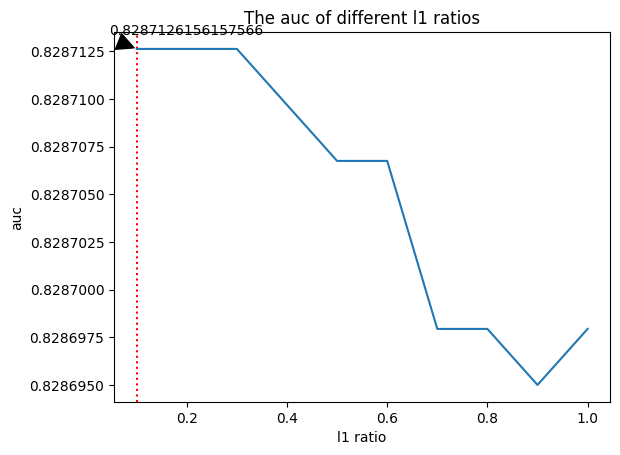

In [5]:
# train the logistic model with different l1 ratio
auc_list2=[]
for l1_ratio in l1_ratio_list:
    clf = LogisticRegression(C=50, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=l1_ratio).fit(X_train_selected_t1, y_train_t1_value)
    y_valid_score=clf.decision_function(X_valid_selected_t1)
    # compute ROC curve and AUC for each learning rate
    fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_score)
    roc_auc = auc(fpr, tpr)
    auc_list2.append(roc_auc)
    print("auc of ", l1_ratio ," : ", roc_auc)

max_auc=max(auc_list2)
index= auc_list2.index(max_auc)
loc=l1_ratio_list[index]
plt.title("The auc of different l1 ratios")
plt.xlabel("l1 ratio")
plt.ylabel("auc")
plt.axvline(x=loc, linestyle="dotted", color='r')
plt.annotate(max_auc, (loc, max_auc), xycoords="data", xytext=(50, 25), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10, horizontalalignment="center", verticalalignment="top")
plt.plot(l1_ratio_list, auc_list2)
#find best l1-ratio: 0.2

Output the result

In [7]:
clf1 = LogisticRegression(C=50, penalty='elasticnet',solver='saga', random_state=0,l1_ratio=0.2).fit(X_train_selected_t1, y_train_t1_value)
print(clf1.score(X_valid_selected_t1, y_valid_t1_value))
y_pred_1=clf1.predict(X_test_selected_t1)

0.9365079365079365


In [8]:

pd.DataFrame(y_pred_1).to_excel(excel_writer=r"C:\Users\gcq20\Desktop\STAT3612\Jebva-LOS-and-Mortality-Project--main\Jebva-LOS-and-Mortality-Project--main\Jebva-LOS-and-Mortality-Project-\real_mean1.xlsx")

Model performance

In [9]:
clf1 = LogisticRegression(C=50, penalty='elasticnet',solver='saga', random_state=0,l1_ratio=0.2).fit(X_train_selected_t1, y_train_t1_value)
print(clf1.score(X_valid_selected_t1, y_valid_t1_value))
y_pred_1=clf1.predict(X_valid_selected_t1)

0.9365079365079365


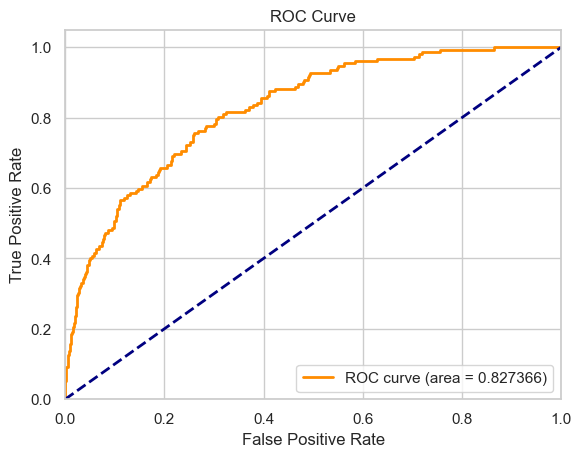

In [10]:
cm=confusion_matrix(y_valid_t1_value, y_pred_1)
y_valid_score=clf1.decision_function(X_valid_selected_t1)

# compute ROC curve and AUC for each learning rate
fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_score)
roc_auc = auc(fpr, tpr)

# plot the graph of ROC curve
sns.set_theme(style="whitegrid")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

Normalized

auc of  0.05  :  0.82430806610639
auc of  0.1  :  0.8277589323442415
auc of  0.2  :  0.8291967932766797
auc of  0.3  :  0.829525447204094
auc of  0.4  :  0.8297249870885957
auc of  0.5  :  0.8297983473402507
auc of  0.6  :  0.8298276914409127
auc of  0.7  :  0.8298922484623692
auc of  0.8  :  0.8298893140523029
auc of  0.9  :  0.8298834452321705
auc of  1.0  :  0.8298658387717733
auc of  10  :  0.8300595098361425
auc of  20  :  0.8300536410160102
auc of  50  :  0.8300477721958777


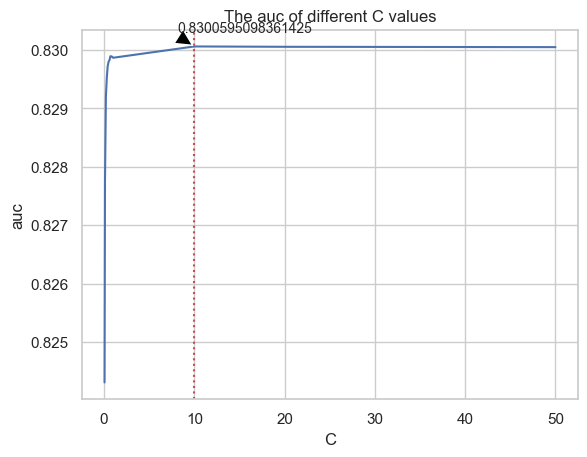

In [11]:
# train the logistic model with different c
import matplotlib.pyplot as plt

auc_list=[]
for c in c_list:
    clf = LogisticRegression(C= c, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=0.7).fit(X_train_selected_t1_norm, y_train_t1_value)
    y_valid_score=clf.decision_function(X_valid_selected_t1_norm)
    # compute ROC curve and AUC for each learning rate
    fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_score)
    roc_auc = auc(fpr, tpr)
    auc_list.append(roc_auc)
    print("auc of ", c ," : ", roc_auc)

max_auc=max(auc_list)
index= auc_list.index(max_auc)
loc=c_list[index]
plt.title("The auc of different C values")
plt.xlabel("C")
plt.ylabel("auc")
plt.axvline(x=loc, linestyle="dotted", color='r')
plt.annotate(max_auc, (loc, max_auc), xycoords="data", xytext=(50, 25), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10, horizontalalignment="center", verticalalignment="top")
plt.plot(c_list, auc_list)
#find best C: 10

auc of  0.1  :  0.8300360345556128
auc of  0.2  :  0.8300419033757452
auc of  0.3  :  0.8300507066059439
auc of  0.4  :  0.83005364101601
auc of  0.5  :  0.8300536410160101
auc of  0.6  :  0.8300595098361425
auc of  0.7  :  0.8300595098361425
auc of  0.8  :  0.8300536410160101
auc of  0.9  :  0.8300389689656791
auc of  1.0  :  0.8300419033757453


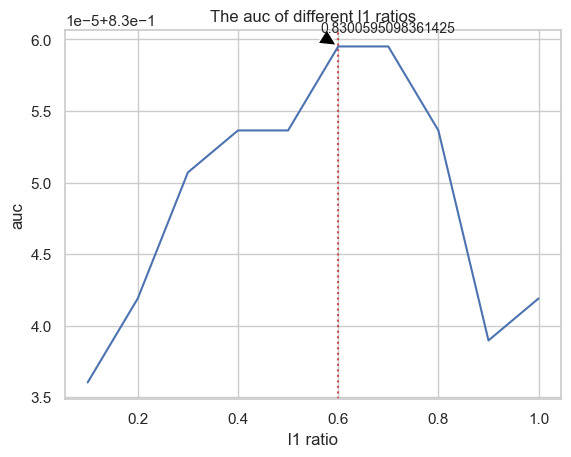

In [12]:
# train the logistic model with different l1 ratio
auc_list2=[]
for l1_ratio in l1_ratio_list:
    clf = LogisticRegression(C=10, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=l1_ratio).fit(X_train_selected_t1_norm, y_train_t1_value)
    y_valid_score=clf.decision_function(X_valid_selected_t1_norm)
    # compute ROC curve and AUC for each learning rate
    fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_score)
    roc_auc = auc(fpr, tpr)
    auc_list2.append(roc_auc)
    print("auc of ", l1_ratio ," : ", roc_auc)

max_auc=max(auc_list2)
index= auc_list2.index(max_auc)
loc=l1_ratio_list[index]
plt.title("The auc of different l1 ratios")
plt.xlabel("l1 ratio")
plt.ylabel("auc")
plt.axvline(x=loc, linestyle="dotted", color='r')
plt.annotate(max_auc, (loc, max_auc), xycoords="data", xytext=(50, 25), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10, horizontalalignment="center", verticalalignment="top")
plt.plot(l1_ratio_list, auc_list2)
#find best l1-ratio: 0.6

Output the result

In [13]:
clf2 = LogisticRegression(C=10, penalty='elasticnet',solver='saga', random_state=0,l1_ratio=0.6).fit(X_train_selected_t1_norm, y_train_t1_value)
print(clf2.score(X_valid_selected_t1_norm, y_valid_t1_value))
y_pred_2=clf2.predict(X_valid_selected_t1_norm)

0.9360902255639098


In [14]:
y_pred=clf2.predict(X_test_selected_t1_norm)

In [15]:
pd.DataFrame(y_pred).to_excel(excel_writer=r"C:\Users\gcq20\Desktop\STAT3612\Jebva-LOS-and-Mortality-Project--main\Jebva-LOS-and-Mortality-Project--main\Jebva-LOS-and-Mortality-Project-\auc_realmean.xlsx")

Model performance

In [16]:
clf2 = LogisticRegression(C=10, penalty='elasticnet',solver='saga', random_state=0,l1_ratio=0.6).fit(X_train_selected_t1_norm, y_train_t1_value)
print(clf2.score(X_valid_selected_t1_norm, y_valid_t1_value))
y_pred_2=clf2.predict(X_valid_selected_t1_norm)

0.9360902255639098


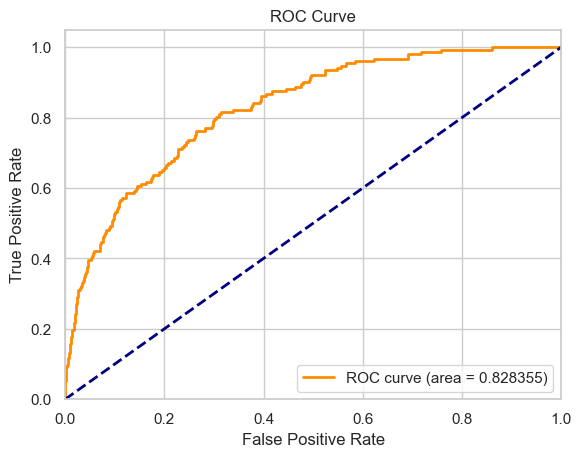

In [17]:
cm=confusion_matrix(y_valid_t1_value, y_pred_2)
y_valid_score=clf2.decision_function(X_valid_selected_t1_norm)

# compute ROC curve and AUC for each learning rate
fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_score)
roc_auc = auc(fpr, tpr)

# plot the graph of ROC curve
sns.set_theme(style="whitegrid")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")